# 파일 경로설정

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"datamonsterlemon","key":"94c442b94a0d21c39731f4a272afd049"}'}

In [9]:

# Step 2: kaggle 설정
!pip install -q kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: 작업 폴더 만들고 이동
!mkdir -p ~/aiffel/jellyfish
!cd ~/aiffel/jellyfish

# Step 4: 데이터 다운로드 및 압축 해제
!kaggle datasets download -d anshtanwar/jellyfish-types
!unzip -o jellyfish-types.zip -d /root/aiffel/jellyfish

Dataset URL: https://www.kaggle.com/datasets/anshtanwar/jellyfish-types
License(s): Attribution 4.0 International (CC BY 4.0)
Archive:  jellyfish-types.zip
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/01.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/02.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/03.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/04.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/05.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/06.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/08.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/10.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/12.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/13.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/14.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/16.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/17.jpg  
  inflating: /root/aiffel/jellyfish/Moon_jellyfish/18.jpg  
  in

# tool

In [10]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import wandb
from wandb.integration.keras import WandbCallback
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import glob
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np

import random


from pathlib import Path
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops

import seaborn as sns
from tqdm import tqdm





from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder



!pip install scikit-image

In [11]:
#통합 작업을 위한 경로 취합

if os.path.exists("/aiffel/aiffel/jellyfish/Train_Test_Valid"):
    base_path = "/aiffel/aiffel/jellyfish/Train_Test_Valid"
elif os.path.exists("C:/Users/kimho/Dlthon_c1/Train_Test_Valid"):
    base_path = "C:/Users/kimho/Dlthon_c1/Train_Test_Valid"
elif os.path.exists("/root/aiffel/jellyfish/Train_Test_Valid"):
    base_path = "/root/aiffel/jellyfish/Train_Test_Valid"

train_path = os.path.join(base_path, "Train")
valid_path = os.path.join(base_path, "valid")
test_path = os.path.join(base_path, "test")

In [12]:


# 공통 옵션: 이미지 정규화
datagen = ImageDataGenerator(rescale=1./255)

base_dir = '/root/aiffel/jellyfish/Train_Test_Valid'

train_gen = datagen.flow_from_directory(
    base_dir + '/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    base_dir + '/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_gen = datagen.flow_from_directory(
    base_dir + '/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # 테스트셋은 결과 비교 위해 섞지 않음
)

Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


# EDA 데이터 확인

In [13]:

# 훈련용 데이터 경로
train_dir = '/root/aiffel/jellyfish/Train_Test_Valid/Train'

# 클래스 목록과 개수 확인
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes}

print(f"총 클래스 수: {len(classes)}개")
print("클래스별 이미지 수:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count}장")

총 클래스 수: 6개
클래스별 이미지 수:
  lions_mane_jellyfish: 150장
  blue_jellyfish: 150장
  mauve_stinger_jellyfish: 150장
  barrel_jellyfish: 150장
  Moon_jellyfish: 150장
  compass_jellyfish: 150장


# 텍스쳐 시각화 0402

<ipython-input-14-b38347f4ebae>:50: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b38347f4ebae>:50: UserWarning: Glyph 53581 (\N{HANGUL SYLLABLE TEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b38347f4ebae>:50: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b38347f4ebae>:50: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b38347f4ebae>:50: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b38347f4ebae>:50: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.ca

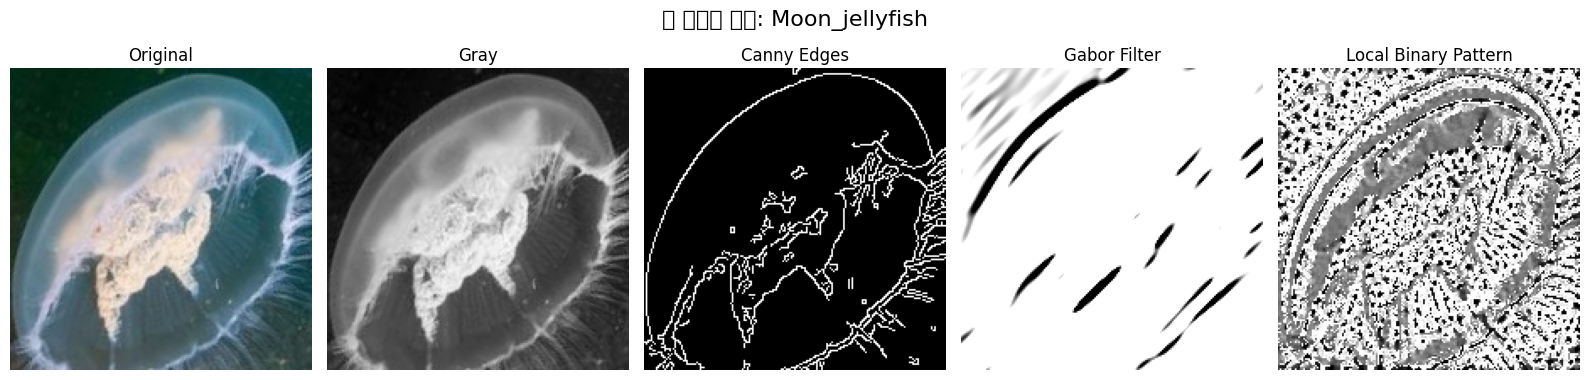

In [14]:


def visualize_texture_from_class(class_name):
    class_path = os.path.join('/root/aiffel/jellyfish/Train_Test_Valid/Train', class_name)
    image_files = os.listdir(class_path)
    img_path = os.path.join(class_path, random.choice(image_files))

    # 원본 이미지 로드
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 1. 윤곽선 (Canny)
    edges = cv2.Canny(gray, 100, 200)

    # 2. Gabor 필터 (방향성 질감)
    g_kernel = cv2.getGaborKernel((31, 31), 4.0, np.pi/4, 10.0, 0.5, 0)
    gabor = cv2.filter2D(gray, cv2.CV_8UC3, g_kernel)

    # 3. LBP (Local Binary Pattern)
    lbp = local_binary_pattern(gray, P=24, R=3, method='uniform')

    # 시각화
    plt.figure(figsize=(16, 4))
    plt.suptitle(f"🧪 텍스처 분석: {class_name}", fontsize=16)

    plt.subplot(1, 5, 1)
    plt.imshow(img_rgb)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Gray')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(gabor, cmap='gray')
    plt.title('Gabor Filter')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(lbp, cmap='gray')
    plt.title('Local Binary Pattern')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# 원하는 클래스 이름만 넣어줘! 예: 'moon_jellyfish'
visualize_texture_from_class('Moon_jellyfish')

랜덤 클래스: compass_jellyfish


<ipython-input-14-b38347f4ebae>:50: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b38347f4ebae>:50: UserWarning: Glyph 53581 (\N{HANGUL SYLLABLE TEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b38347f4ebae>:50: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b38347f4ebae>:50: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b38347f4ebae>:50: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b38347f4ebae>:50: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


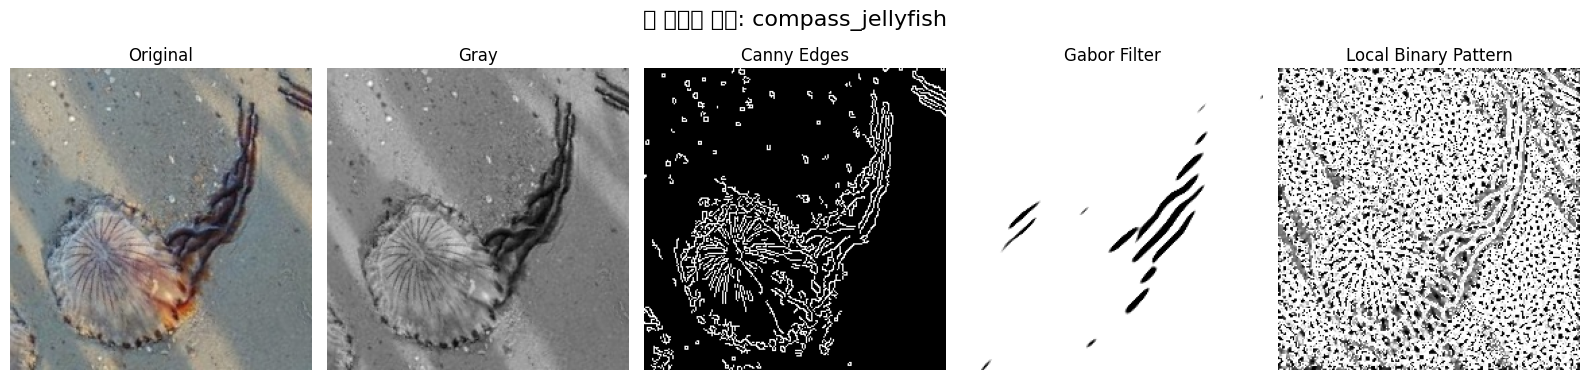

In [15]:
def get_random_classname():
    train_path = '/root/aiffel/jellyfish/Train_Test_Valid/Train'
    return random.choice(os.listdir(train_path))

random_class = get_random_classname()
print(f"랜덤 클래스: {random_class}")
visualize_texture_from_class(random_class)

# TextureAnalyzer 진행시 클래스별 차이 시각화 0404

텍스처 분석 시작...


100%|██████████| 6/6 [01:15<00:00, 12.57s/it]


클래스 간 비교 시각화...


<ipython-input-19-9cd36949631f>:161: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-9cd36949631f>:161: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-9cd36949631f>:161: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-9cd36949631f>:161: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-9cd36949631f>:161: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-9cd36949631f>:161: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-9cd36949631f>:161: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_lay

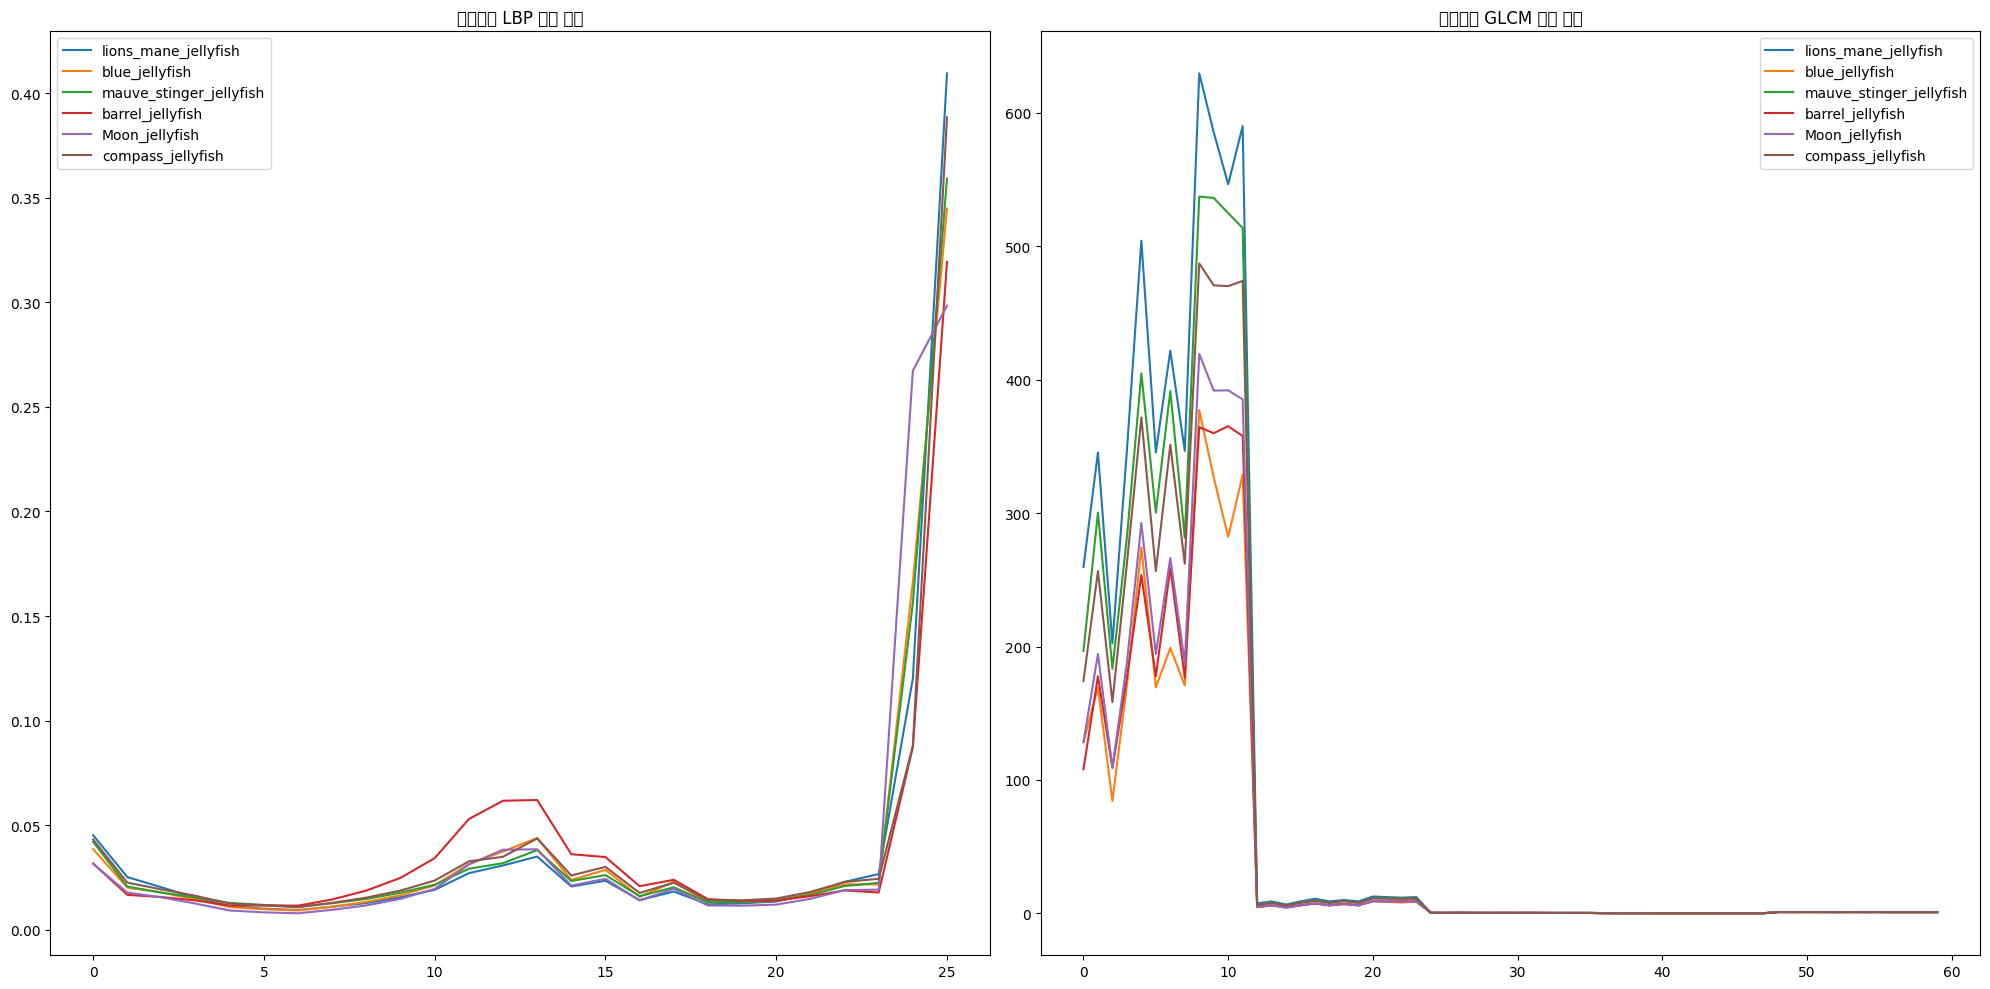

상세 텍스처 분석...

lions_mane_jellyfish 분석:


<ipython-input-19-9cd36949631f>:91: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-9cd36949631f>:91: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-9cd36949631f>:91: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-9cd36949631f>:91: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-9cd36949631f>:91: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-9cd36949631f>:91: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-9cd36949631f>:91: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-i

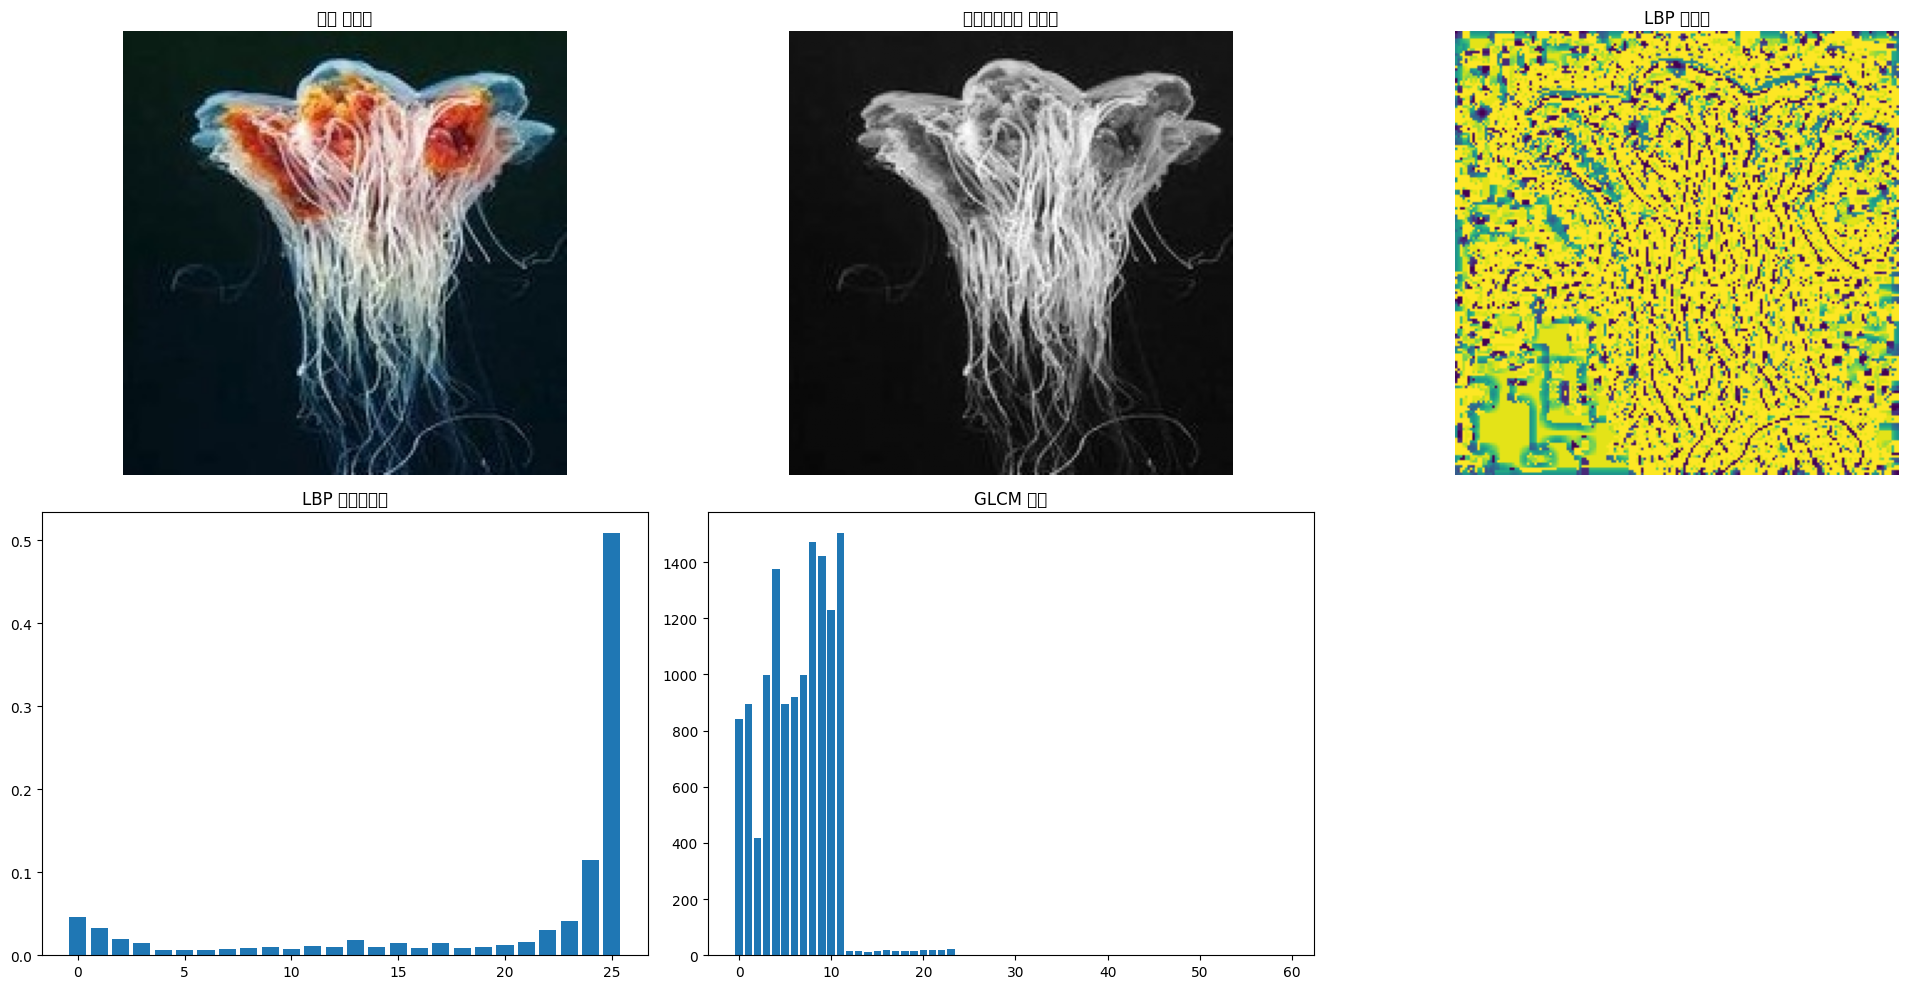


blue_jellyfish 분석:


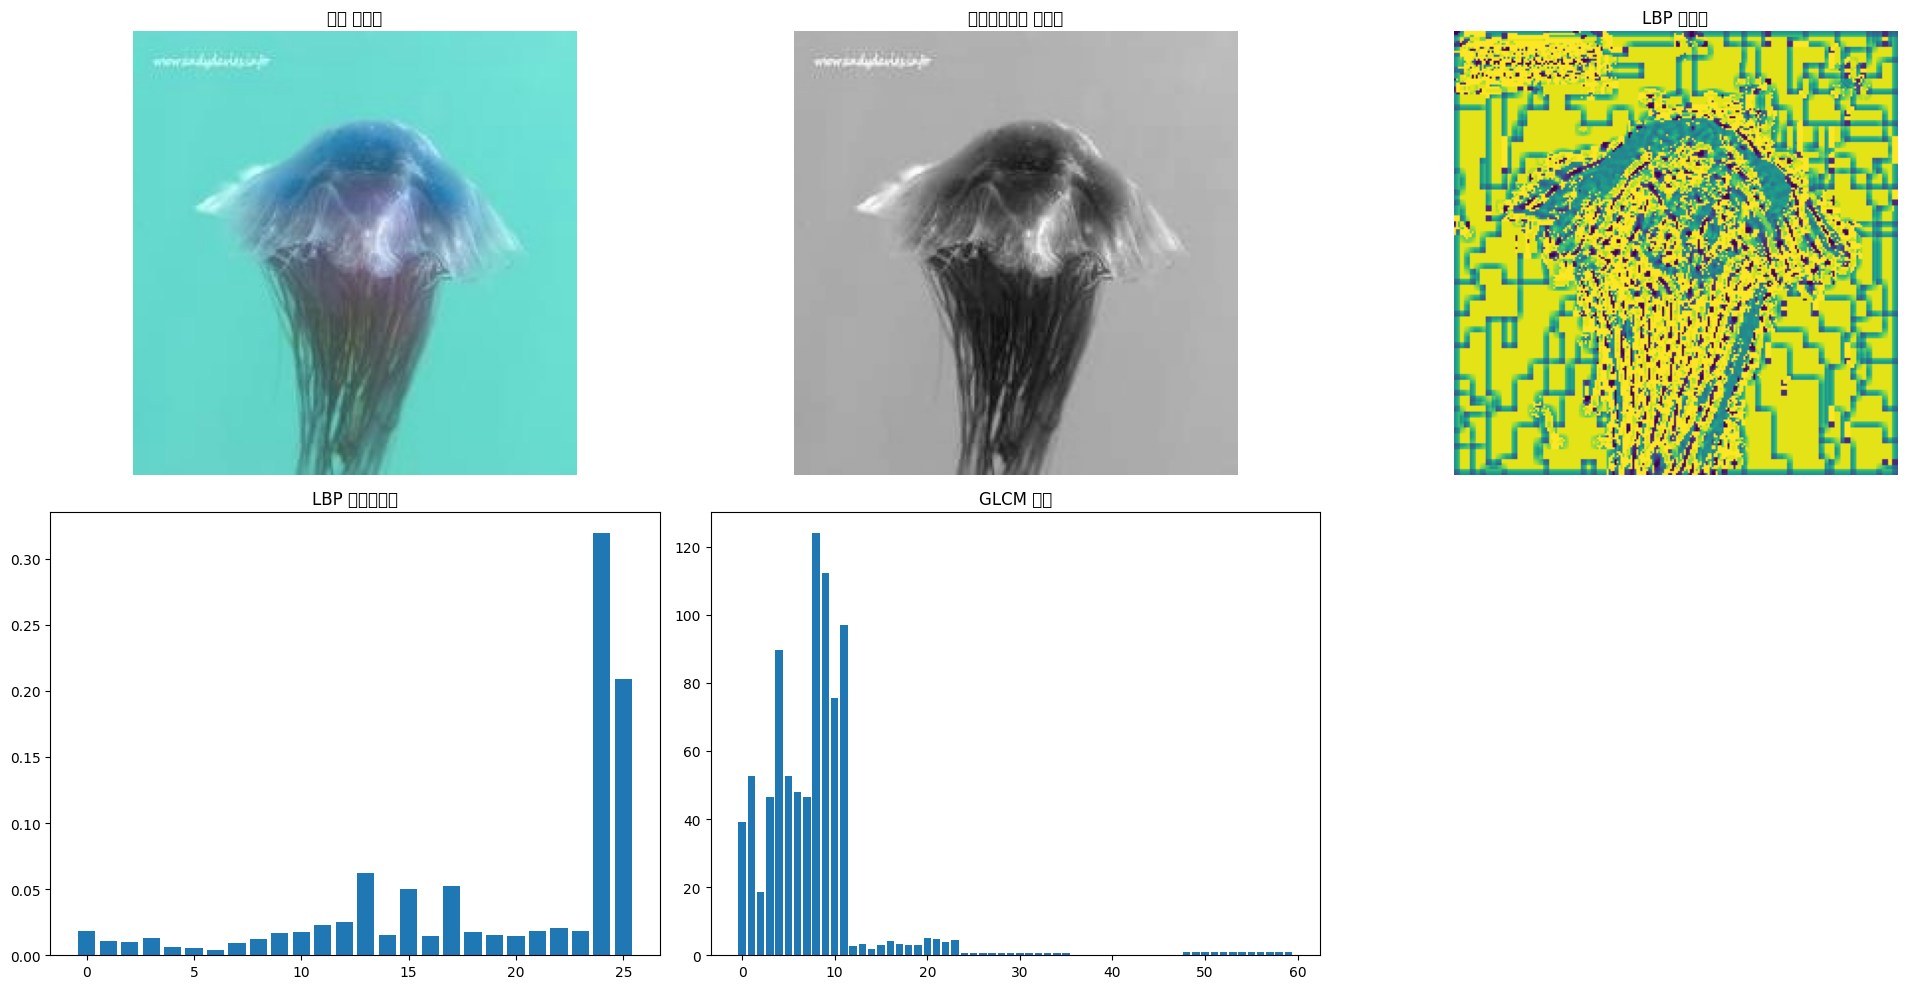


mauve_stinger_jellyfish 분석:


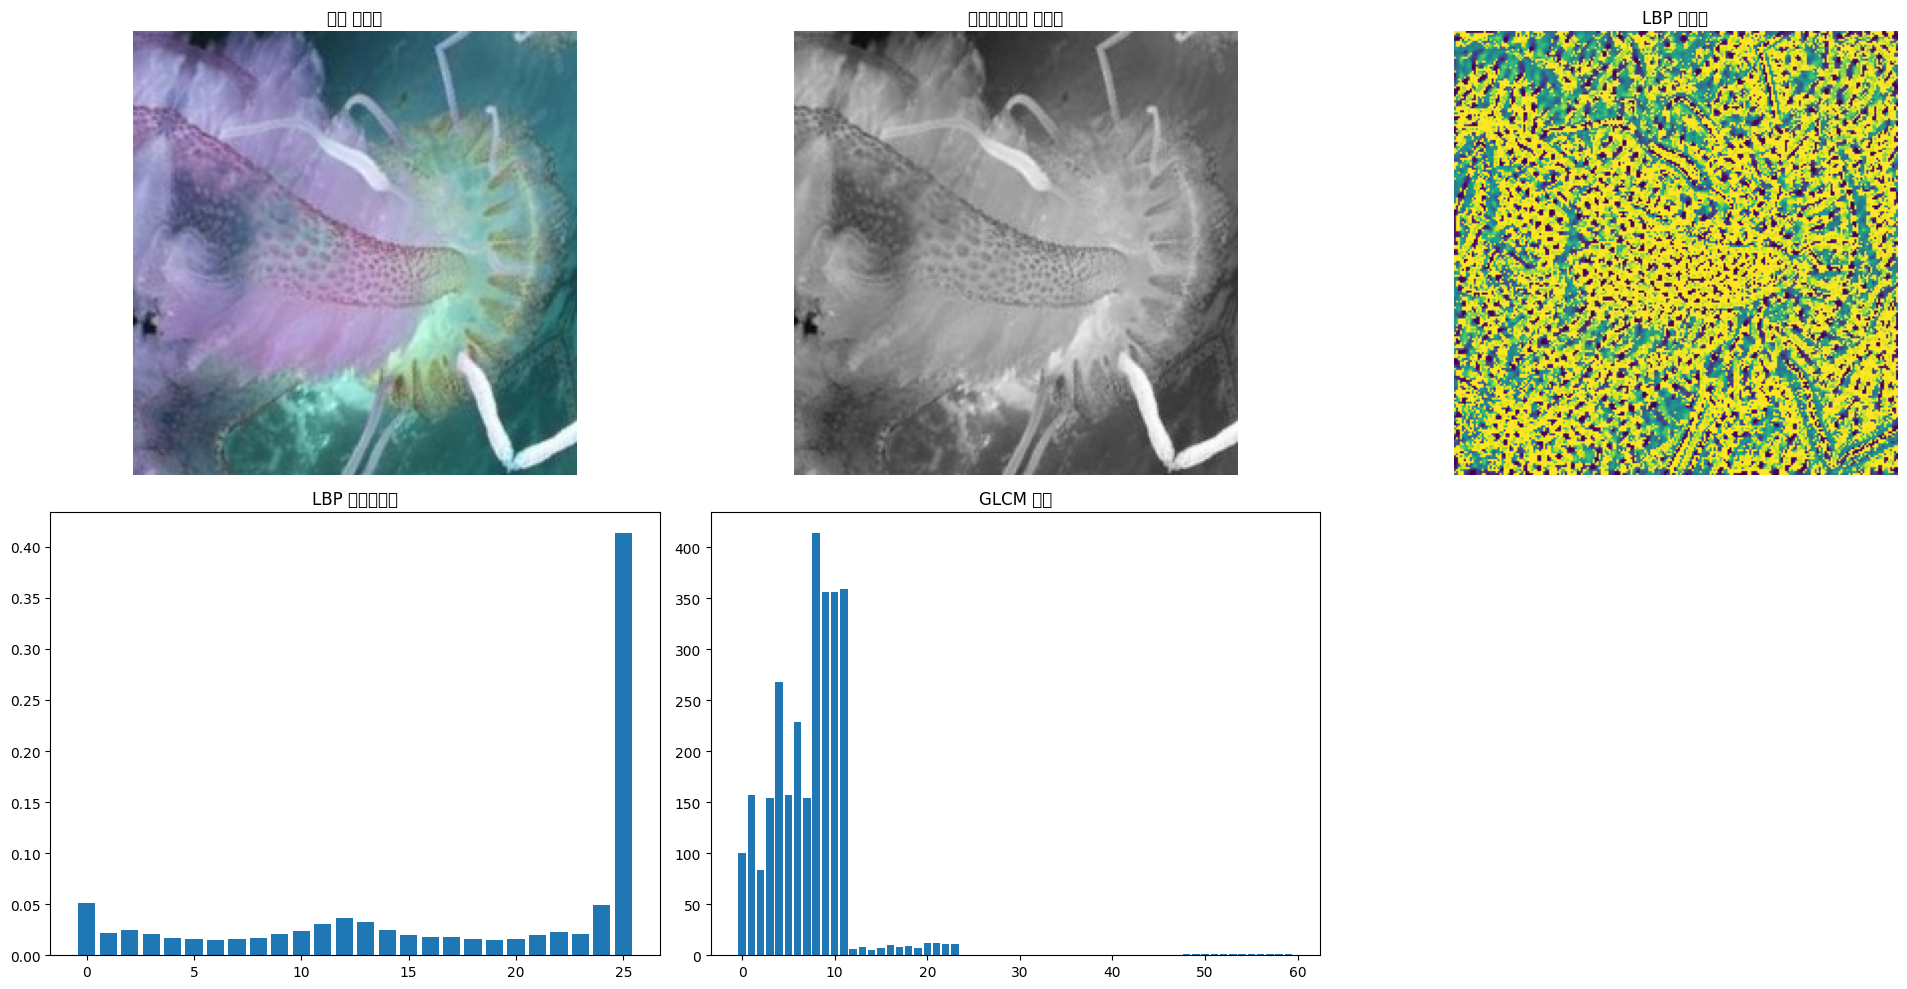


barrel_jellyfish 분석:


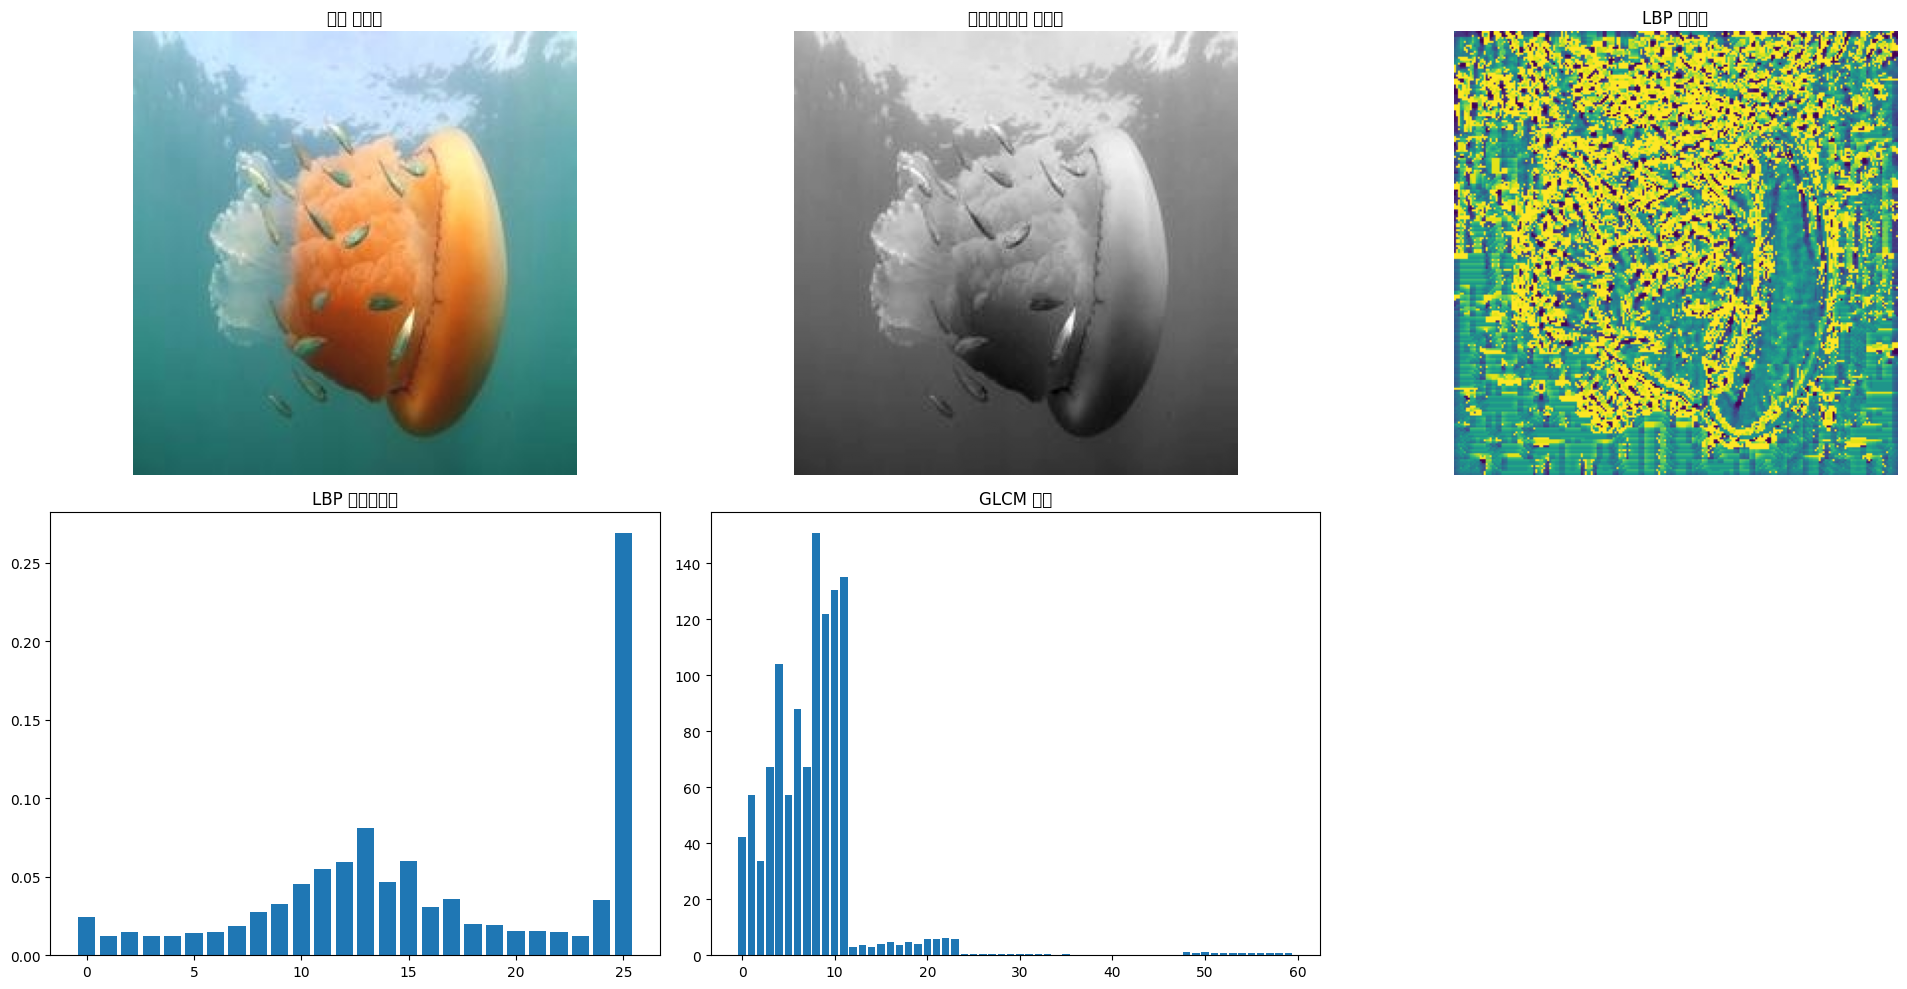


Moon_jellyfish 분석:


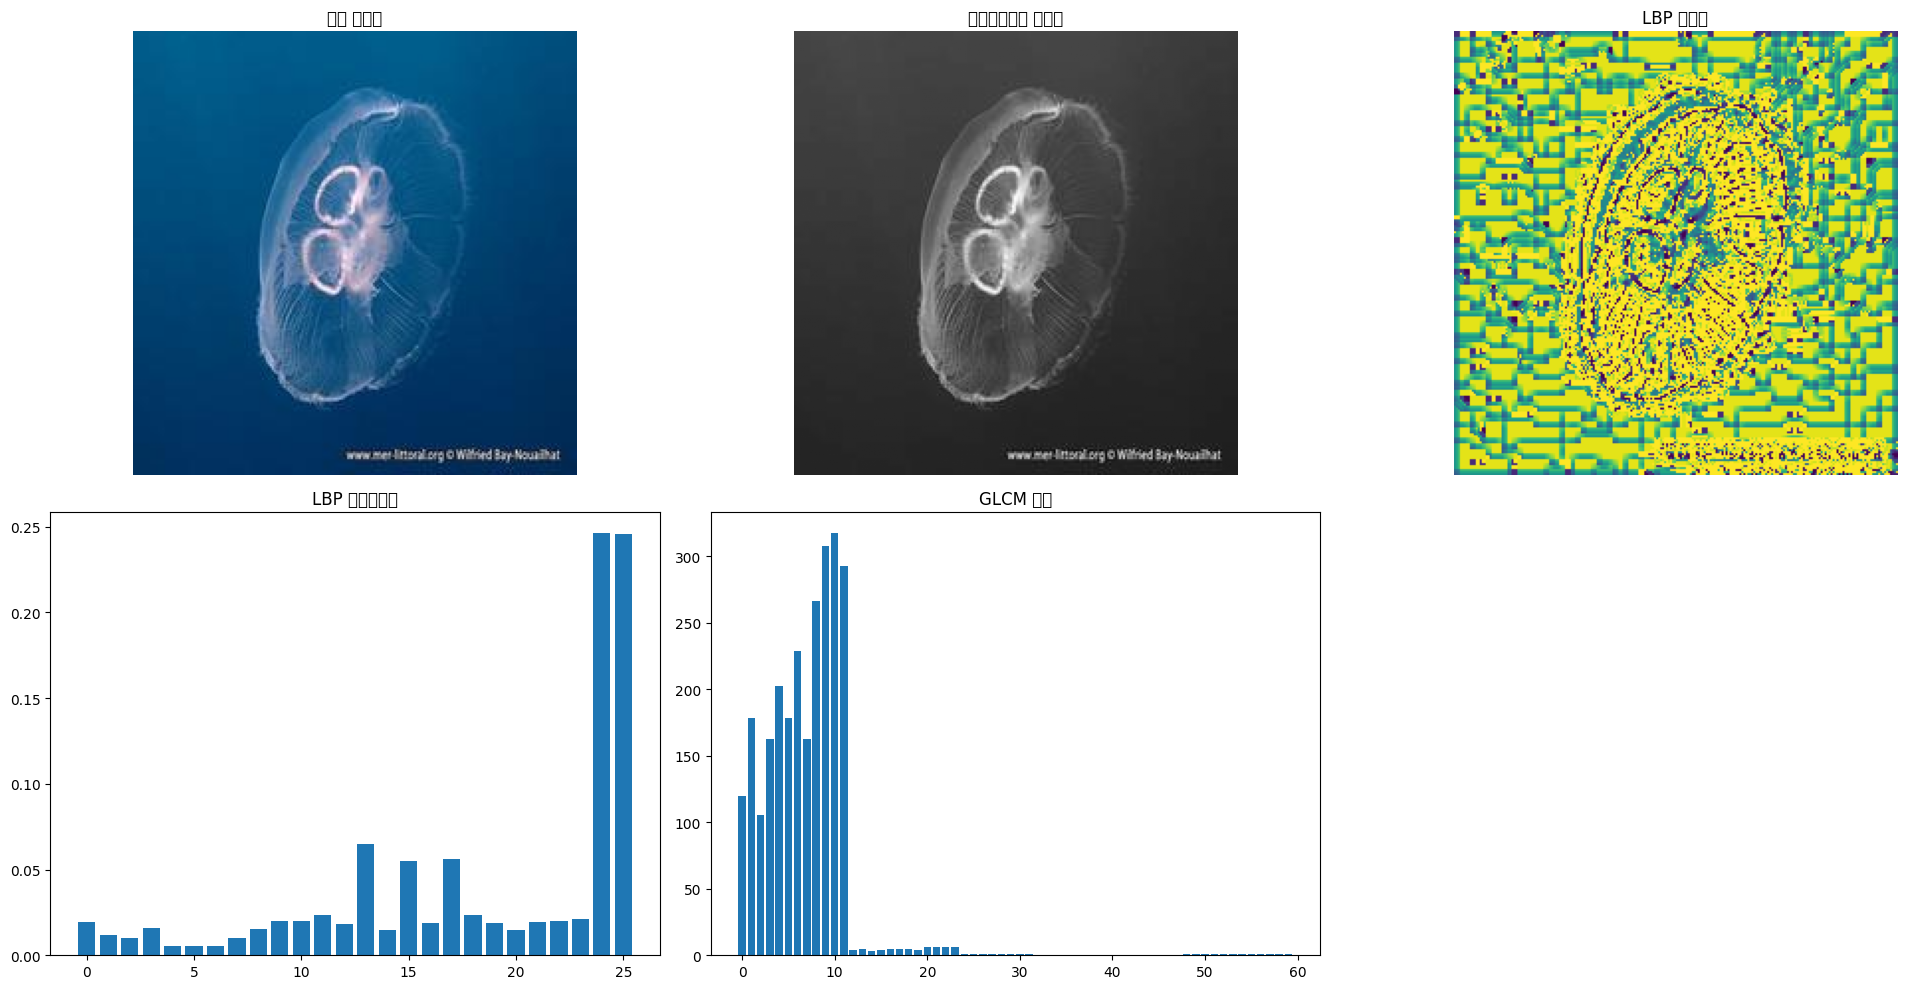


compass_jellyfish 분석:


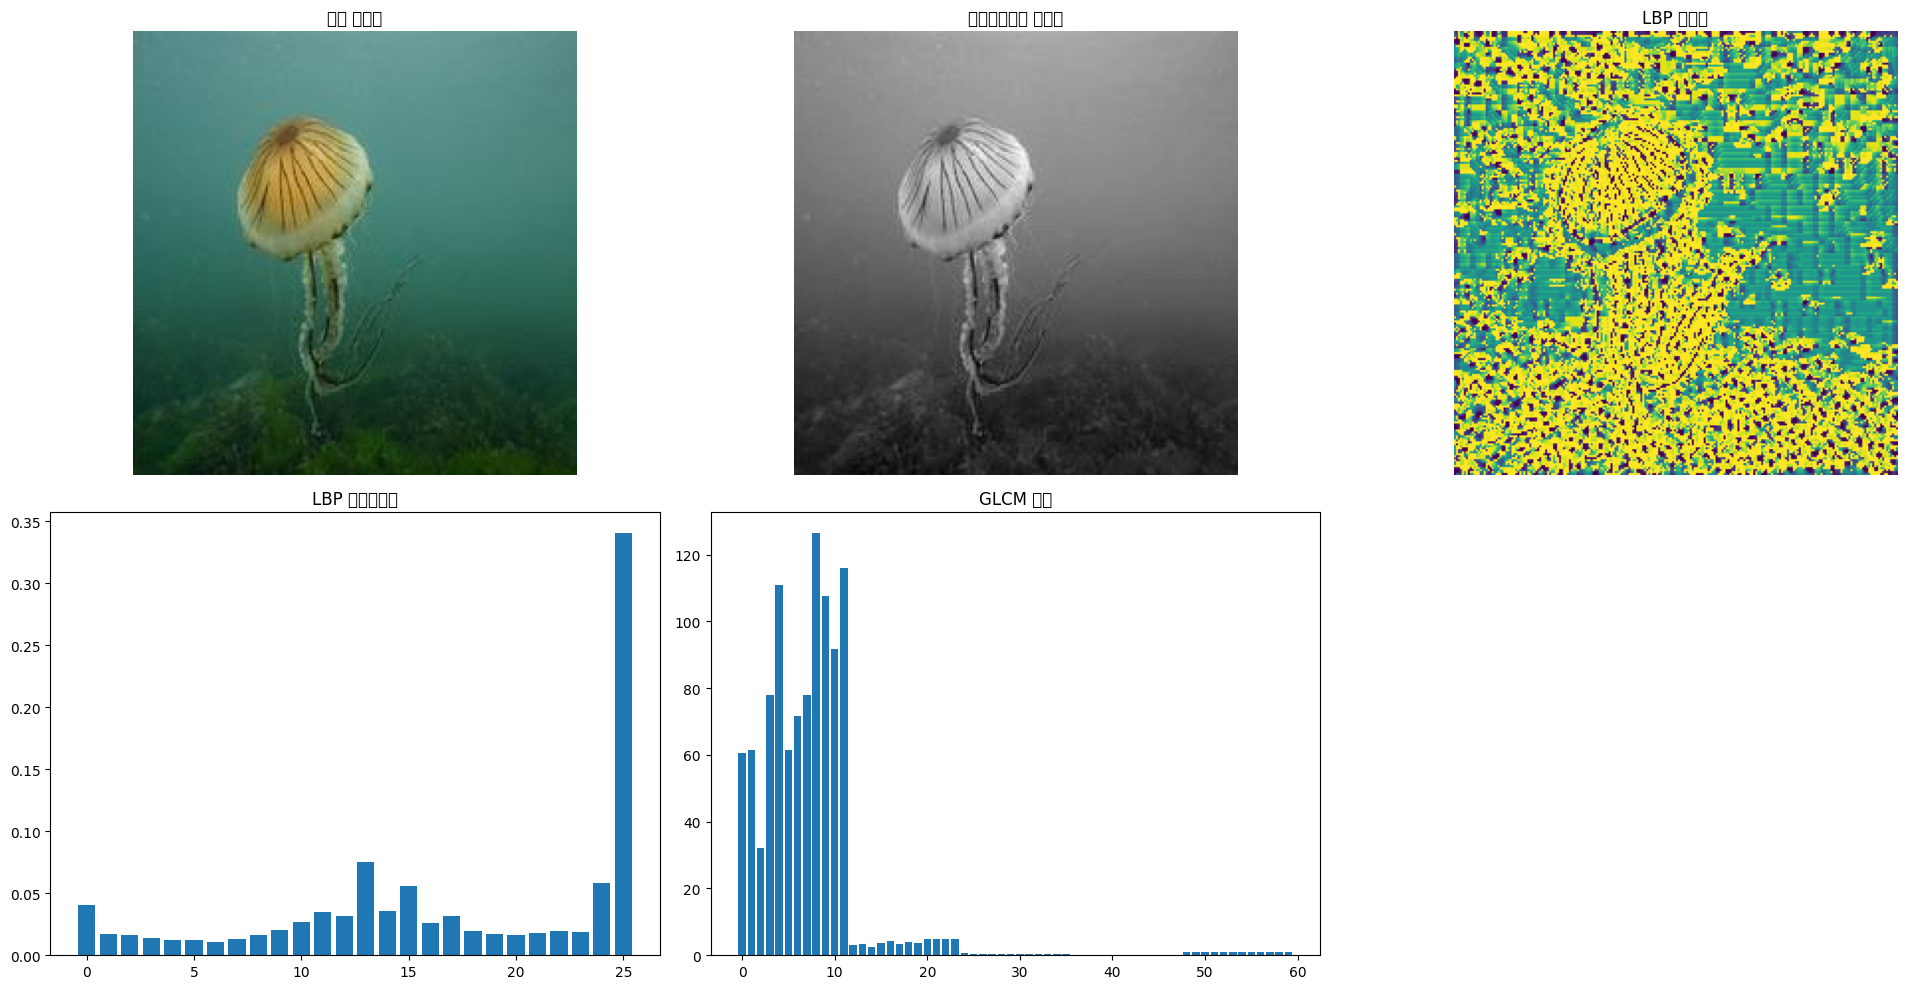

In [19]:
from pathlib import Path

base_path = "/root/aiffel/jellyfish/Train_Test_Valid/Train"
base_path = Path(base_path)


class TextureAnalyzer:
    def __init__(self, image_path):
        """
        텍스처 분석을 위한 클래스 초기화
        """
        self.image_path = Path(image_path)
        self.image = cv2.imread(str(image_path))
        if self.image is None:
            raise ValueError(f"이미지를 로드할 수 없습니다: {image_path}")
        self.gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

    def extract_lbp_features(self, radius=3, n_points=24):
        """
        LBP(Local Binary Pattern) 특성 추출
        """
        lbp = local_binary_pattern(self.gray, n_points, radius, method='uniform')
        hist, _ = np.histogram(lbp, bins=n_points+2, range=(0, n_points+2), density=True)
        return hist, lbp

    def extract_glcm_features(self):
        """
        GLCM(Gray Level Co-occurrence Matrix) 특성 추출
        """
        distances = [1, 2, 3]
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        glcm = graycomatrix(self.gray, distances=distances, angles=angles,
                           levels=256, symmetric=True, normed=True)

        features = []
        props = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

        for prop in props:
            features.append(graycoprops(glcm, prop).flatten())

        return np.hstack(features), glcm

    def extract_all_features(self):
        """
        모든 텍스처 특성 추출
        """
        lbp_hist, lbp = self.extract_lbp_features()
        glcm_features, glcm = self.extract_glcm_features()

        return {
            'lbp_hist': lbp_hist,
            'lbp_image': lbp,
            'glcm_features': glcm_features,
            'glcm': glcm
        }

    def visualize_features(self, features):
        """
        추출된 특성 시각화
        """
        plt.figure(figsize=(20, 10))

        # 원본 이미지
        plt.subplot(2, 3, 1)
        plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))
        plt.title('원본 이미지')
        plt.axis('off')

        # 그레이스케일 이미지
        plt.subplot(2, 3, 2)
        plt.imshow(self.gray, cmap='gray')
        plt.title('그레이스케일 이미지')
        plt.axis('off')

        # LBP 이미지
        plt.subplot(2, 3, 3)
        plt.imshow(features['lbp_image'], cmap='viridis')
        plt.title('LBP 이미지')
        plt.axis('off')

        # LBP 히스토그램
        plt.subplot(2, 3, 4)
        plt.bar(range(len(features['lbp_hist'])), features['lbp_hist'])
        plt.title('LBP 히스토그램')

        # GLCM 특성
        plt.subplot(2, 3, 5)
        plt.bar(range(len(features['glcm_features'])), features['glcm_features'])
        plt.title('GLCM 특성')

        plt.tight_layout()
        plt.savefig('texture_features.png', dpi=300, bbox_inches='tight')
        plt.show()

def analyze_directory(directory_path):
    """
    디렉토리 내의 모든 이미지에 대해 텍스처 분석 수행
    """
    directory_path = Path(base_path)
    results = {}

    # 각 클래스 디렉토리 처리
    for class_dir in tqdm(list(directory_path.glob('*'))):
        if not class_dir.is_dir():
            continue

        class_name = class_dir.name
        results[class_name] = []

        # 각 이미지 파일 처리
        for img_path in class_dir.glob('*.jpg'):
            try:
                analyzer = TextureAnalyzer(img_path)
                features = analyzer.extract_all_features()
                results[class_name].append({
                    'path': str(img_path),
                    'features': features
                })
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

    return results

def visualize_class_comparison(results):
    """
    클래스 간 텍스처 특성 비교 시각화
    """
    # 각 클래스의 평균 특성 계산
    class_features = {}
    for class_name, images in results.items():
        if not images:
            continue

        # LBP 특성 평균
        lbp_features = np.mean([img['features']['lbp_hist'] for img in images], axis=0)
        # GLCM 특성 평균
        glcm_features = np.mean([img['features']['glcm_features'] for img in images], axis=0)

        class_features[class_name] = {
            'lbp': lbp_features,
            'glcm': glcm_features
        }

    # 시각화
    plt.figure(figsize=(20, 10))

    # LBP 특성 비교
    plt.subplot(1, 2, 1)
    for class_name, features in class_features.items():
        plt.plot(features['lbp'], label=class_name)
    plt.title('클래스별 LBP 특성 비교')
    plt.legend()

    # GLCM 특성 비교
    plt.subplot(1, 2, 2)
    for class_name, features in class_features.items():
        plt.plot(features['glcm'], label=class_name)
    plt.title('클래스별 GLCM 특성 비교')
    plt.legend()

    plt.tight_layout()
    plt.savefig('class_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

def main():
    # 데이터셋 경로 설정
    dataset_path = Path(base_path)

    # 전체 디렉토리 분석
    print("텍스처 분석 시작...")
    results = analyze_directory(dataset_path)

    # 클래스 간 비교 시각화
    print("클래스 간 비교 시각화...")
    visualize_class_comparison(results)

    # 각 클래스의 대표 이미지에 대한 상세 분석
    print("상세 텍스처 분석...")
    for class_name, images in results.items():
        if not images:
            continue

        print(f"\n{class_name} 분석:")
        analyzer = TextureAnalyzer(images[0]['path'])
        features = analyzer.extract_all_features()
        analyzer.visualize_features(features)

if __name__ == "__main__":
    main()


1. LBP(Local Binary Pattern) 특성 비교 그래프:

이 그래프는 각 해파리 종류의 표면 패턴을 나타냅니다
X축: LBP 특성의 인덱스 (0~26)
Y축: 각 특성의 값 (빈도)
각 선은 다른 해파리 종류를 나타냅니다
해석 방법:
높은 값: 해당 패턴이 많이 나타남
낮은 값: 해당 패턴이 적게 나타남
선의 모양이 비슷한 해파리들은 표면 패턴이 유사함
선의 모양이 다른 해파리들은 표면 패턴이 다름

2. GLCM(Gray Level Co-occurrence Matrix) 특성 비교 그래프:
이 그래프는 이미지의 텍스처 통계적 특성을 나타냅니다
X축: GLCM 특성의 인덱스 (0~19)
Y축: 각 특성의 값
각 선은 다른 해파리 종류를 나타냅니다
해석 방법:
contrast(대비): 높을수록 텍스처의 대비가 강함
dissimilarity(비유사성): 높을수록 픽셀 간 차이가 큼
homogeneity(균일성): 높을수록 텍스처가 균일함
energy(에너지): 높을수록 텍스처가 규칙적임
correlation(상관관계): 높을수록 픽셀 간 상관관계가 강함


실제 예시로 설명하면:
만약 두 해파리 종류의 LBP 그래프가 비슷한 모양을 보인다면:
두 해파리는 표면 패턴이 유사함
예: 둘 다 반복적인 패턴이나 비슷한 질감을 가짐
GLCM 그래프에서 특정 해파리가 contrast가 높다면:
그 해파리는 표면의 명암 대비가 강함
예: 밝은 부분과 어두운 부분의 차이가 큰 해파리
만약 특정 해파리의 homogeneity가 높다면:
그 해파리는 표면이 균일하고 일관된 패턴을 가짐
예: 단색에 가까운 해파리
이러한 그래프를 통해:
어떤 해파리 종류들이 텍스처적으로 유사한지
각 해파리의 표면 특성이 어떤지
텍스처 기반으로 해파리를 구분할 수 있는지
를 파악할 수 있습니다.


🔍 현재 그래프에서 보이는 특징

1. LBP (Local Binary Pattern)
	•	전체적으로 클래스 간 차이가 미미함.
	•	마지막 쪽 (bin 25~26)에서 살짝 차이가 나지만 분명한 클래스 간 분리는 어려워 보여.

2. GLCM (Gray Level Co-occurrence Matrix)
	•	확실히 전반적으로 비슷한 패턴.
	•	일부 클래스(lions_mane_jellyfish)는 약간 튀는 경향은 있지만, 다른 클래스와 많이 겹침.

⸻

🤔 결론: 텍스처만으로는 구분력이 낮아 보임

즉, 다음과 같은 판단 가능:
	•	해파리 종류는 텍스처보다는 형태(shape), 색상(color), 모양의 윤곽(contour) 등이 더 큰 영향을 줄 수 있음.
	•	텍스처 특징(LBP, GLCM)은 추가적인 보조 특성으로 쓸 수는 있지만, 단독으로 쓰기엔 성능 한계가 있음.

# 텍스쳐 시각화 모델 돌려보기 0403

In [ ]:

# 🔧
DATASET_PATH = '/root/aiffel/jellyfish/Train_Test_Valid/Train'

# ✅ 클래스별 텍스처 시각화
def visualize_texture_samples(base_dir, samples_per_class=2):
    class_names = os.listdir(base_dir)
    plt.figure(figsize=(18, len(class_names) * 3))
    idx = 1
    for class_name in class_names:
        image_dir = os.path.join(base_dir, class_name)
        image_files = random.sample(os.listdir(image_dir), samples_per_class)
        for img_file in image_files:
            img_path = os.path.join(image_dir, img_file)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            g_kernel = cv2.getGaborKernel((21, 21), 4.0, np.pi/4, 10.0, 0.5, 0)
            gabor = cv2.filter2D(gray, cv2.CV_8UC3, g_kernel)
            lbp = local_binary_pattern(gray, P=24, R=3, method='uniform')

            # Original
            plt.subplot(len(class_names), samples_per_class * 3, idx)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"{class_name} - Original")
            plt.axis('off')
            idx += 1

            # Gabor
            plt.subplot(len(class_names), samples_per_class * 3, idx)
            plt.imshow(gabor, cmap='gray')
            plt.title("Gabor")
            plt.axis('off')
            idx += 1

            # LBP
            plt.subplot(len(class_names), samples_per_class * 3, idx)
            plt.imshow(lbp, cmap='gray')
            plt.title("LBP")
            plt.axis('off')
            idx += 1


    plt.tight_layout()
    plt.show()

# ✅ 텍스처 피처 추출 (LBP + Gabor + Canny)
def extract_texture_features(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # LBP 히스토그램
    lbp = local_binary_pattern(gray, P=24, R=3, method='uniform')
    hist_lbp, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 24 + 3), range=(0, 24 + 2))
    hist_lbp = hist_lbp.astype("float")
    hist_lbp /= (hist_lbp.sum() + 1e-7)

    # Gabor 필터 (4방향)
    gabor_feats = []
    for theta in [0, np.pi/4, np.pi/2, 3*np.pi/4]:
        g_kernel = cv2.getGaborKernel((21, 21), 4.0, theta, 10.0, 0.5, 0)
        filtered = cv2.filter2D(gray, cv2.CV_8UC3, g_kernel)
        gabor_feats.extend([filtered.mean(), filtered.std()])


    # Gabor 필터 (8방향)
    # gabor_feats = []
    # for theta in np.linspace(0, np.pi, 8, endpoint=False):  # 0부터 pi까지 8등분
    #   g_kernel = cv2.getGaborKernel((21, 21), 4.0, theta, 10.0, 0.5, 0)
    #   filtered = cv2.filter2D(gray, cv2.CV_8UC3, g_kernel)
    #   gabor_feats.extend([filtered.mean(), filtered.std()])

    # Canny 에지 밀도
    edges = cv2.Canny(gray, 100, 200)
    edge_density = np.sum(edges > 0) / edges.size

    return np.concatenate([hist_lbp, gabor_feats, [edge_density]])

# ✅ 전체 데이터셋 벡터화
def build_dataset(base_dir):
    X, y = [], []
    class_names = os.listdir(base_dir)
    for class_name in class_names:
        class_path = os.path.join(base_dir, class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            feat = extract_texture_features(img_path)
            X.append(feat)
            y.append(class_name)
    return np.array(X), np.array(y)



# ✅ 실행 순서
# print("📸 샘플 시각화 중...")
# visualize_texture_samples(DATASET_PATH)

print("📦 데이터셋 구축 중...")
X, y = build_dataset(DATASET_PATH)
# ⬇️ 2. 여기서 y (클래스 라벨)를 숫자로 변환
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y 대신 y_encoded 사용해야 함


print("📏 스케일링 & 분할 중...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ⬇️ 3. 여기서 분할할 때도 y_encoded 사용
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


print("🚀 모델 학습 중...")
model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

print("🧪 테스트셋 평가 중...")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자 → 문자열 라벨 복원
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# 혼동 행렬 계산
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Texture Feature Classification')
plt.tight_layout()
plt.show()

**🤔 모델을 돌렸을때의 결론: **

*   텍스쳐 시각화 자체가 클래스별로 큰 차이가 없었기 때문에
텍스쳐 시각화로 모델을 돌렸을때 정확도는 59% 정도로 성능이 떨어짐




## Resnet50 모델 0402

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# 데이터 경로 설정
train_dir = '/root/aiffel/jellyfish/Train_Test_Valid/Train'
val_dir = '/root/aiffel/jellyfish/Train_Test_Valid/valid'

# 데이터 전처리 (리사이즈 + 정규화 + 증강)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)

# ✅ ResNet50 불러오기 (pretrained)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True  # 일단 전체 freeze

# 분류기 붙이기
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습
model.fit(train_gen, validation_data=val_gen, epochs=10)

In [ ]:
test_dir = '/root/aiffel/jellyfish/Train_Test_Valid/test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 모델 평가
loss, acc = model.evaluate(test_gen)
print(f"✅ 테스트 정확도: {acc*100:.2f}%")

In [ ]:
image_input = Input(shape=(224, 224, 3), name="image_input")
texture_input = Input(shape=(texture_scaled.shape[1],), name="texture_input")

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=image_input)
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)

t = Dense(64, activation='relu')(texture_input)

combined = Concatenate()([x, t])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.3)(combined)
output = Dense(y_train.shape[1], activation='softmax')(combined)

model = Model(inputs=[image_input, texture_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit([X_img_train, X_tex_train], y_train,
          validation_data=([X_img_test, X_tex_test], y_test),
          epochs=10, batch_size=32)

하나의 클래스만 찍어버리는 경향이 생김

🔍 왜 ResNet50이 특정 클래스에만 과몰입했을까?

✅ 1. 데이터 클래스 불균형
	•	특정 클래스 이미지 수가 훨씬 많으면, 모델이 그 클래스만 자꾸 맞추려고 해.
	•	예: Moon_jellyfish가 많으면 다 그걸로 찍음 → 정확도는 높지만 의미 없음.

✅ 2. 특징이 비슷해서 분류가 어렵다
	•	해파리 데이터가 전체적으로 텍스처나 색, 형태가 비슷하면 CNN이 특징을 제대로 분리 못 함.
	•	특히 ResNet은 이미지 전체에서 특징을 뽑기 때문에 미묘한 차이를 못 잡아낼 수 있음.

✅ 3. Loss 함수가 class 간 균형을 고려 안 함
	•	기본 CrossEntropyLoss는 클래스 불균형에 민감해서 흔히 이런 현상이 생김.

# 채널평균

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

train_path = '/root/aiffel/jellyfish/Train_Test_Valid/Train'

r_values = []
g_values = []
b_values = []

# 전체 이미지 순회
for class_name in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    for img_name in tqdm(os.listdir(class_dir), desc=f"Processing {class_name}"):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        img = cv2.resize(img, (224, 224))
        img = img / 255.0  # 정규화

        b, g, r = cv2.split(img)

        b_values.append(b.flatten())
        g_values.append(g.flatten())
        r_values.append(r.flatten())

# 배열로 합치기
r_all = np.concatenate(r_values)
g_all = np.concatenate(g_values)
b_all = np.concatenate(b_values)

# 평균과 표준편차 계산
r_mean, r_std = np.mean(r_all), np.std(r_all)
g_mean, g_std = np.mean(g_all), np.std(g_all)
b_mean, b_std = np.mean(b_all), np.std(b_all)

print("📊 채널 평균 + 표준편차:")
print(f"Red   - mean: {r_mean:.4f}, std: {r_std:.4f}")
print(f"Green - mean: {g_mean:.4f}, std: {g_std:.4f}")
print(f"Blue  - mean: {b_mean:.4f}, std: {b_std:.4f}")